In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../current_metadata_ena.tsv', sep='\t')
df.index = df.run_accession

/opt/hostedtoolcache/Python/3.8.6/x64/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,21,27,31,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
date = pd.read_csv('../accession_and_date.tsv', sep='\t', header=None)

In [4]:
date.columns = ['accession', 'date']

In [5]:
by_date = date.date.value_counts()

Text(0.5, 1.0, 'All published SRA/ENA accessions by date')

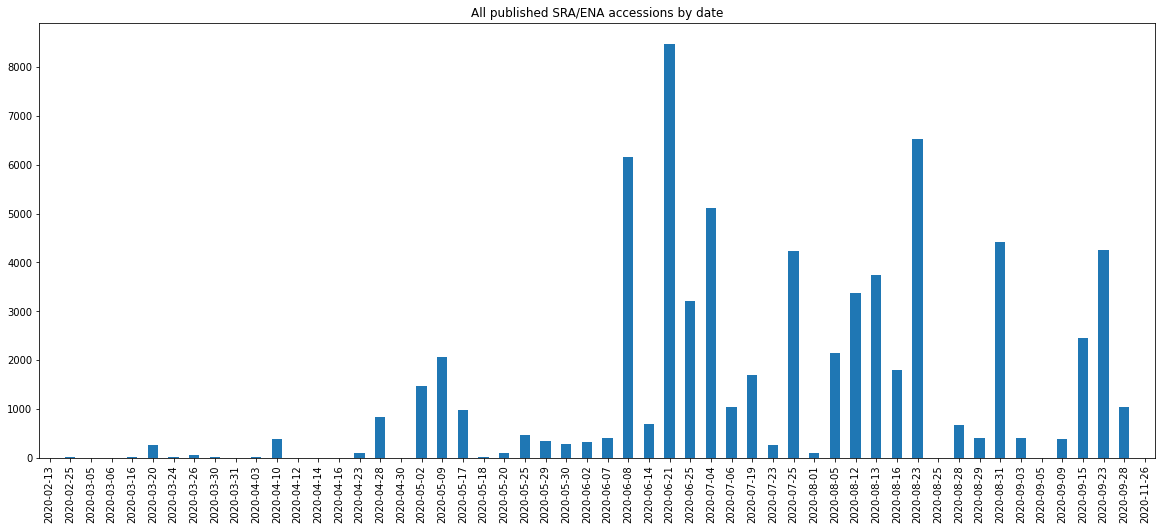

In [6]:
by_date.sort_index().plot(kind='bar', figsize=(20, 8)).set_title("All published SRA/ENA accessions by date")

In [7]:
date['is_sra'] = date.accession.str.startswith('SRR')

In [8]:
by_date_by_center = date.groupby(['date', 'is_sra']).count().reset_index()

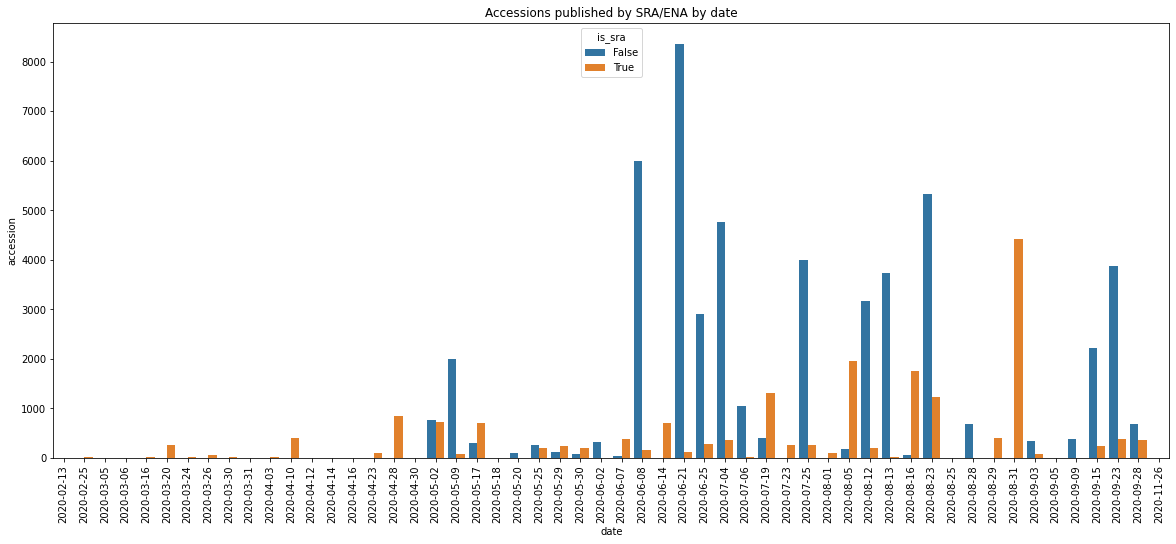

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x='date', y='accession', hue='is_sra', data=by_date_by_center, ax=ax)
ax.set_title('Accessions published by SRA/ENA by date')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [10]:
instruments = df.groupby(['instrument_platform', 'instrument_model']).count()['accession'].reset_index()
instruments

,instrument_platform,instrument_model,accession
0,ILLUMINA,Illumina HiSeq 2500,2323
1,ILLUMINA,Illumina MiSeq,2874
2,ILLUMINA,Illumina MiniSeq,1
3,ILLUMINA,Illumina NovaSeq 6000,406
4,ILLUMINA,NextSeq 500,1527
5,ILLUMINA,NextSeq 550,6752
6,ILLUMINA,unspecified,179
7,OXFORD_NANOPORE,GridION,8673
8,OXFORD_NANOPORE,MinION,1688
9,OXFORD_NANOPORE,PromethION,12


In [11]:
df.groupby(['library_strategy', 'instrument_platform']).count()['accession'].reset_index()

,library_strategy,instrument_platform,accession
0,AMPLICON,ILLUMINA,13672
1,AMPLICON,OXFORD_NANOPORE,10373
2,OTHER,ILLUMINA,5
3,RNA-Seq,ILLUMINA,1
4,Targeted-Capture,ILLUMINA,376
5,WGS,ILLUMINA,8


Text(0.5, 1.0, 'Desposited accessions by Country')

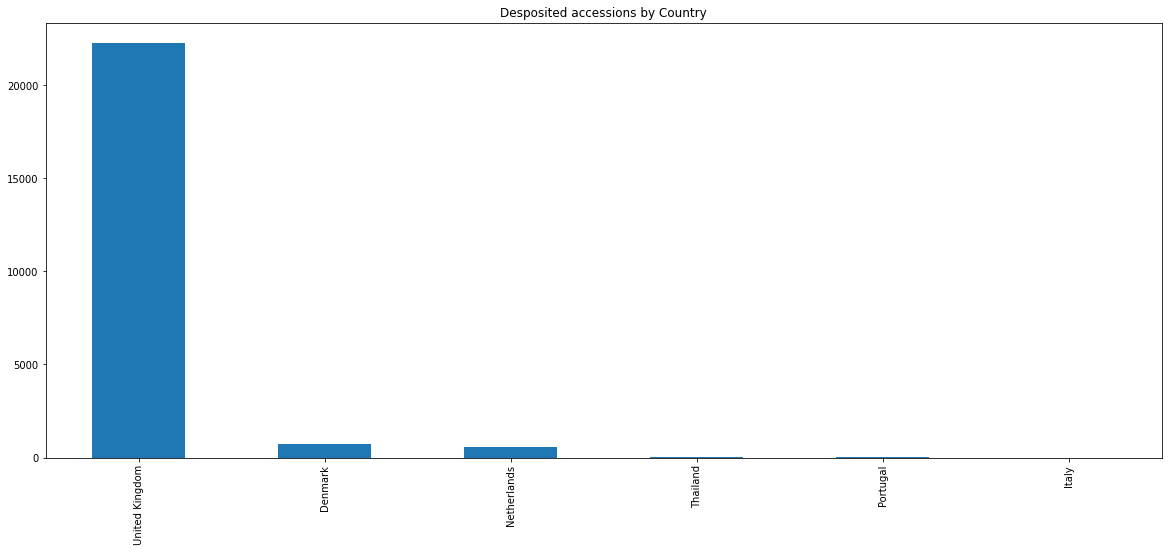

In [12]:
df.country.str.replace(':.*', '').value_counts().plot(kind='bar', figsize=(20, 8)).set_title("Desposited accessions by Country")

In [13]:
df['sex'] = df.apply(axis=1, func=lambda row: row['host_sex'] or row['submitted_host_sex'])
df.sex.value_counts()

female    323
male      171
Name: sex, dtype: int64

In [14]:
df.isolation_source.value_counts()

not collected    584
not provided     334
Name: isolation_source, dtype: int64

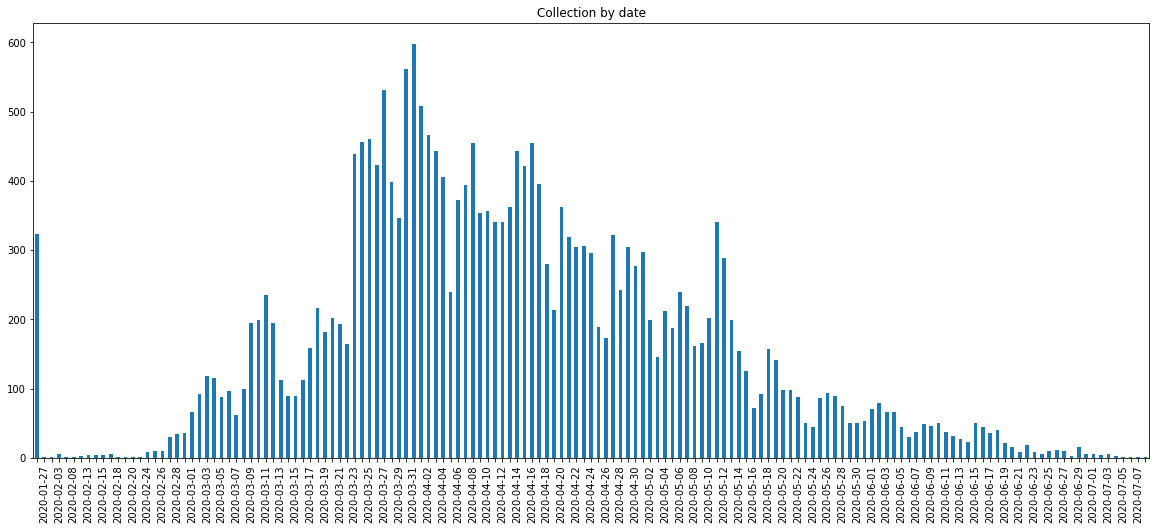

In [15]:
ax = df.collection_date.value_counts().sort_index().plot(kind='bar', figsize=(20, 8))
ax.set_title('Collection by date')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)